In [1]:
import networkx as nx
import numpy as np

In [2]:
path = "D:\\Academics\\Introduction to Data Science\\project\\data\\"

G_init = nx.Graph()
d = {}
prd = {}
for year in range(2009, 2012):
    for month in range(1,13):
        f1 = open(path +str(year)+"\\"+ 'outputs' + str(year) + '_' + str(month) + '.txt', 'r')
        f = open(path +str(year)+"\\"+ 'inputs' + str(year) + '_' + str(month) + '.txt', 'r')
        data = f1.readlines()
        for trnx in data:
            trnx = trnx[:-1].split("\t")
            ind=0
            for i in range(2, len(trnx), 2):
                if G_init.has_edge(trnx[1], trnx[i]):
                    G_init[trnx[1]][trnx[i]]['weight'] += float(trnx[i+1])/10**8
                    d[(trnx[1], str(ind))] = [trnx[i], G_init[trnx[1]][trnx[i]]['weight']]
                else:
                    d[(trnx[1], str(ind))] = [trnx[i], float(trnx[i+1])/10**8]
                    G_init.add_edge(trnx[1], trnx[i], weight = float(trnx[i+1])/10**8)
                ind+=1
        data = f.readlines()
        for trnx in data:
            trnx = trnx[:-1].split("\t")
            in_addr_cost = []
            f=0
            for i in range(2, len(trnx), 2):
                try:
                    in_addr_cost.append(d[(trnx[i], trnx[i+1])])
                except:
                    f=1
            neigh = list(G_init.neighbors(trnx[1]))
            outcost = np.array([G_init[trnx[1]][v]['weight'] for v in neigh])
            if f==1:
                if in_addr_cost == []:
                    in_addr_cost.append(['unknown', sum(outcost)])
                else: 
                    s = sum(map(float, np.array(in_addr_cost)[:,1]))
                    in_addr_cost.append(['unknown', sum(outcost)-s])

            in_addr_cost = np.array(in_addr_cost).transpose()
            s = sum(map(float, list(in_addr_cost[1])))
            in_addr_cost[1] = np.array(list(map(float, in_addr_cost[1])))/s
            G_init.remove_node(trnx[1])
            for i in range(len(in_addr_cost[1])):
                costs = float(in_addr_cost[1][0])*outcost
                for j in range(len(neigh)):
                    if in_addr_cost[0][i]!='noaddress' and in_addr_cost[0][i] !='unknown' and neigh[j]!='noaddress' and neigh[j]!='unknown' and in_addr_cost[0][i] != neigh[j]:
                        if G_init.has_edge(in_addr_cost[0][i], neigh[j]):
                            G_init[in_addr_cost[0][i]][neigh[j]]['weight'] += float(costs[j])
                        else:
                            G_init.add_edge(in_addr_cost[0][i], neigh[j], weight = float(costs[j]))

        if('noaddress' in G_init):
            G_init.remove_node('noaddress')
        if('unknown' in G_init):
            G_init.remove_node('unknown')
        
        largest = max(nx.connected_components(G_init), key = len)
        largest = nx.subgraph(G_init, largest)
        nx.write_graphml(G_init, path + "LCC//" + str(year) + "_" + str(month))
        print(G_init.number_of_nodes(), largest.number_of_nodes(),  largest.number_of_nodes()/G_init.number_of_nodes(),year, month)

2 1 0.5 2009 1
8 2 0.25 2009 2
8 2 0.25 2009 3
12 2 0.16666666666666666 2009 4
19 2 0.10526315789473684 2009 5
21 2 0.09523809523809523 2009 6
24 2 0.08333333333333333 2009 7
25 2 0.08 2009 8
25 2 0.08 2009 9
30 6 0.2 2009 10
35 10 0.2857142857142857 2009 11
51 10 0.19607843137254902 2009 12
67 10 0.14925373134328357 2010 1
105 11 0.10476190476190476 2010 2
145 17 0.11724137931034483 2010 3
3515 3353 0.9539118065433855 2010 4
3744 3508 0.936965811965812 2010 5
4407 4185 0.9496255956432947 2010 6
21652 20845 0.9627286162941068 2010 7
27572 26559 0.9632598288118381 2010 8
35493 34322 0.9670075789592314 2010 9
44716 43527 0.9734099651131586 2010 10
58543 57229 0.9775549596023436 2010 11
73553 72111 0.9803950892553669 2010 12
102375 100989 0.9864615384615385 2011 1
154531 153072 0.9905585287094499 2011 2
235040 232648 0.9898230088495575 2011 3
320660 318156 0.9921911058441963 2011 4
502030 498828 0.9936218951058702 2011 5
926342 922876 0.9962584013247807 2011 6
1408276 1404474 0.9973002451

In [ ]:
# print(G_init.number_of_nodes(), largest.number_of_nodes(),  largest.number_of_nodes()/G_init.number_of_nodes(),year, month)
# largest connected component
# 2 1 0.5 2009 1
# 8 2 0.25 2009 2
# 8 2 0.25 2009 3
# 12 2 0.16666666666666666 2009 4
# 19 2 0.10526315789473684 2009 5
# 21 2 0.09523809523809523 2009 6
# 24 2 0.08333333333333333 2009 7
# 25 2 0.08 2009 8
# 25 2 0.08 2009 9
# 30 6 0.2 2009 10
# 35 10 0.2857142857142857 2009 11
# 51 10 0.19607843137254902 2009 12
# 67 10 0.14925373134328357 2010 1
# 105 11 0.10476190476190476 2010 2
# 145 17 0.11724137931034483 2010 3
# 3515 3353 0.9539118065433855 2010 4
# 3744 3508 0.936965811965812 2010 5
# 4407 4185 0.9496255956432947 2010 6
# 21652 20845 0.9627286162941068 2010 7
# 27572 26559 0.9632598288118381 2010 8
# 35493 34322 0.9670075789592314 2010 9
# 44716 43527 0.9734099651131586 2010 10
# 58543 57229 0.9775549596023436 2010 11
# 73553 72111 0.9803950892553669 2010 12
# 102375 100989 0.9864615384615385 2011 1
# 154531 153072 0.9905585287094499 2011 2
# 235040 232648 0.9898230088495575 2011 3
# 320660 318156 0.9921911058441963 2011 4
# 502030 498828 0.9936218951058702 2011 5
# 926342 922876 0.9962584013247807 2011 6
# 1408276 1404474 0.997300245122405 2011 7
# 1784883 1780453 0.9975180446001223 2011 8
# 2054950 2051523 0.9983323195211562 2011 9
# 2256466 2252734 0.9983460863137313 2011 10
# 2443383 2440133 0.9986698769697587 2011 11
# 2605279 2601064 0.9983821310500718 2011 12

In [2]:
def invert_dict(d):
    d2 = {}
    for i in d:
        if d[i] in d2:
            d2[d[i]].append(i)
        else:
            d2[d[i]] = [i]
    return d2

## Clustering Coefficient

In [1]:
# CLustering Coefficient

# directed
# 0.0 2009 1
# 0.0 2009 2
# 0.0 2009 3
# 0.0 2009 4
# 0.0 2009 5
# 0.0 2009 6
# 0.0 2009 7
# 0.0 2009 8
# 0.0 2009 9
# 0.0 2009 10
# 0.0 2009 11
# 0.0 2009 12
# 0.0 2010 1
# 0.015873015873015872 2010 2
# 0.010344827586206896 2010 3
# 0.5922528269978193 2010 4
# 0.5663780049801589 2010 5
# 0.49537004517422983 2010 6
# 0.3329729249852852 2010 7
# 0.2835146102112767 2010 8
# 0.24943673756265797 2010 9
# 0.20984918506976596 2010 10
# 0.21543083288419768 2010 11
# 0.18128593913978144 2010 12
# 0.15811997996307636 2011 1
# 0.11739734744357648 2011 2
# 0.10890378445118984 2011 3
# 0.1000934973574445 2011 4
# 0.08023383102330875 2011 5
# 0.06564566549410313 2011 6

#undirected
# 0.0 2009 1
# 0.0 2009 2
# 0.0 2009 3
# 0.0 2009 4
# 0.0 2009 5
# 0.0 2009 6
# 0.0 2009 7
# 0.0 2009 8
# 0.0 2009 9
# 0.0 2009 10
# 0.0 2009 11
# 0.0 2009 12
# 0.0 2010 1
# 0.015873015873015872 2010 2
# 0.010344827586206896 2010 3
# 0.5922528269978193 2010 4
# 0.5663780049801589 2010 5
# 0.49537004517422983 2010 6
# 0.3329729249852852 2010 7
# 0.2835146102112767 2010 8
# 0.24943673756265797 2010 9
# 0.20984918506976596 2010 10
# 0.21543083288419768 2010 11
# 0.18128593913978144 2010 12
# 0.15811997996307636 2011 1
# 0.11739734744357648 2011 2
# 0.10890378445118984 2011 3
# 0.1000934973574445 2011 4
# 0.08023383102330875 2011 5
# 0.06564566549410313 2011 6
# 0.05959903674042382 2011 7

## Pagerank and Small World

In [4]:
# p = nx.pagerank(G)
# p = invert_dict(p)
# top_pr_node = []
# for i in sorted(list(p.keys()))[::-1][:100]:
#     top_pr_node.append(p[i])

In [5]:
# top_pr_nodes

In [7]:
# top_pr_node == top_pr_nodes

In [2]:
path = "D:\\Academics\\Introduction to Data Science\\project\\data\\"
G = nx.read_graphml(path + "UG_NSL_NME\\2011_7.graphml")

In [3]:
largest_strong = max(nx.connected_components(G), key = len)

In [10]:
# largest_strong

In [5]:
number_nodes = {}
q = ['1V5yGhpZicSFZDemTyReQFkthiHbNLwdQ']
l = [0]
while(q != []):
    s = q.pop(0)
    lev = l.pop(0)
    try:
        number_nodes[lev] += 1
    except:
        number_nodes[lev] = 1
    for i in nx.neighbors(bfs, s):
        q.append(i)
        l.append(lev+1)

In [ ]:
number_nodes

In [4]:
bfs = nx.bfs_tree(G,'1V5yGhpZicSFZDemTyReQFkthiHbNLwdQ')

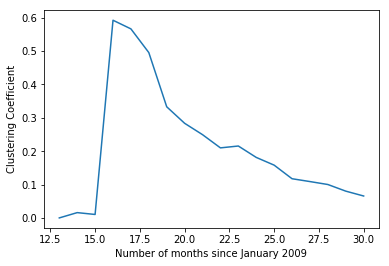

In [3]:
import matplotlib.pyplot as plt
cc = [0.0, 0.015873015873015872, 0.010344827586206896, 0.5922528269978193, 0.5663780049801589, 0.49537004517422983, 0.3329729249852852, 
0.2835146102112767, 0.24943673756265797, 0.20984918506976596, 0.21543083288419768, 0.18128593913978144, 0.15811997996307636, 
0.11739734744357648, 0.10890378445118984, 0.1000934973574445, 0.08023383102330875, 0.06564566549410313]
plt.plot(range(13, 31), cc)
plt.xlabel("Number of months since January 2009")
plt.ylabel("Clustering Coefficient")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
cc = [0.0, 0.015873015873015872, 0.010344827586206896, 0.5922528269978193, 0.5663780049801589, 0.49537004517422983, 0.3329729249852852, 
0.2835146102112767, 0.24943673756265797, 0.20984918506976596, 0.21543083288419768, 0.18128593913978144, 0.15811997996307636, 
0.11739734744357648, 0.10890378445118984, 0.1000934973574445, 0.08023383102330875, 0.06564566549410313]
plt.plot(range(13, 31), cc)
plt.xlabel("Number of months since January 2009")
plt.ylabel("Clustering Coefficient")
plt.title("Undirected Graphs")